In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv('/content/LTP.csv', encoding="ISO-8859-1")

In [3]:
def ganti_nilai(kolom):
    return kolom.replace(['inf', '-inf', '-'], np.nan)

In [4]:
selected = df.columns
df[selected] = df[selected].apply(ganti_nilai)

In [5]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].nunique())
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'laptop_ID':
1303
[   1    2    3 ... 1318 1319 1320]

Nilai unik pada kolom 'Company':
19
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Nilai unik pada kolom 'Product':
618
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'

In [6]:
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

dtype = Ram, Weight


In [18]:
df.drop(columns=['laptop_ID'],inplace=True)

In [19]:
df["Ram"] = df["Ram"].str.replace('GB', '')
df["Ram"] = df["Ram"].astype(int)

df["Weight"] = df["Weight"].str.replace('kg', '')
df["Weight"] = df["Weight"].astype(float)

In [24]:
'''
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
'''

"\ndf['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)\ndf['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)\n"

In [25]:
# Pisahkan apkah IPS Panel atau bukan
def cek_ips(x):
  if x[0] == 'IPS':
    return 'YES'
  else:
    return 'NO'

df['Is_IPS'] = df['ScreenResolution'].str.split(' ').apply(lambda x: cek_ips(x))

In [26]:
# Pisahkan resolution x dan y
df['ScreenResolution'] = df['ScreenResolution'].str.split(' ').apply(lambda x: x[-1])
df['x_res'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[0])
df['y_res'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[1])

In [27]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [28]:
df.head()

Company      Product   TypeName  Inches                         Cpu  Ram  \
0   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5 2.3GHz    8   
1   Apple  Macbook Air  Ultrabook    13.3        Intel Core i5 1.8GHz    8   
2      HP       250 G6   Notebook    15.6  Intel Core i5 7200U 2.5GHz    8   
3   Apple  MacBook Pro  Ultrabook    15.4        Intel Core i7 2.7GHz   16   
4   Apple  MacBook Pro  Ultrabook    13.3        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

   Price_euros Is_IPS x_res y_res  
0      1339.69    YES  2560  1600  
1       898.94     NO  1440   900  
2       575.00     NO  1920  1080  
3      2537.45    YES  2880  1800  
4      1803.60    YES  2560  1600

In [29]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [30]:
df['Cpu_Brand'] = df['Cpu'].apply(lambda x:' '.join(x.split()[ : 3]))

In [31]:
def fetch_processor(data):
    if data in {'Intel Core i7','Intel Core i5', 'Intel Core i3'}:
        return data
    elif 'Intel' in data:
        return 'Other Intel Processor'
    return 'AMD and Samsung Processor'

In [32]:
df['Cpu_Brand'] = df['Cpu_Brand'].apply(fetch_processor)

In [33]:
df['Cpu_Brand'].value_counts()

Cpu_Brand
Intel Core i7                527
Intel Core i5                423
Other Intel Processor        154
Intel Core i3                136
AMD and Samsung Processor     63
Name: count, dtype: int64

In [34]:
df['CPU_Hz'] = df['Cpu'].str.split(' ').apply(lambda x: x[-1])

In [36]:
df["CPU_Hz"] = df["CPU_Hz"].str.replace('GHz', '')
df["CPU_Hz"] = df["CPU_Hz"].astype(float)

In [38]:
df.drop(columns=['Cpu'],inplace=True)

In [39]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [40]:
df['Memory'].apply(lambda value: value if 'SSD'  in value else '0').unique()

array(['128GB SSD', '0', '256GB SSD', '512GB SSD', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '64GB SSD',
       '512GB SSD +  1TB HDD', '1TB SSD', '256GB SSD +  500GB HDD',
       '128GB SSD +  2TB HDD', '512GB SSD +  512GB SSD', '16GB SSD',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD', '180GB SSD',
       '1TB SSD +  1TB HDD', '240GB SSD', '8GB SSD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [41]:
df['SSD'] = df['Memory'].apply(lambda value: value if 'SSD'  in value else '0')
df['SSD'] = df['SSD'].apply(lambda value: '0' if '+' in value else value) # ganti dengan 0 jika ada +
df['SSD'].unique()

array(['128GB SSD', '0', '256GB SSD', '512GB SSD', '32GB SSD', '64GB SSD',
       '1TB SSD', '16GB SSD', '180GB SSD', '240GB SSD', '8GB SSD'],
      dtype=object)

In [42]:
df['SSD'].str.split(' ').apply(lambda x: x[0]).unique()

array(['128GB', '0', '256GB', '512GB', '32GB', '64GB', '1TB', '16GB',
       '180GB', '240GB', '8GB'], dtype=object)

In [43]:
df['SSD'] = df['SSD'].str.split(' ').apply(lambda x: x[0])
df["SSD"] = df["SSD"].str.replace('GB', '')

In [44]:
df['SSD'] = df['SSD'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)

In [45]:
df['HDD'] = df['Memory'].apply(lambda value: value if 'HDD'  in value else '0')

In [46]:
HDD = df['HDD'].str.split('HDD', n=1, expand=True)
df['HDD'] = HDD[0]
df['HDD'] = df['HDD'].str.replace('GB','')
df['HDD'] = df['HDD'].str.replace(' ','')

In [47]:
df['HDD'].unique()

array(['0', '500', '1TB', '128SSD+1TB', '256SSD+1TB', '256SSD+2TB', '2TB',
       '512SSD+1TB', '256SSD+500', '128SSD+2TB', '512SSD+2TB',
       '64FlashStorage+1TB', '32', '1TBSSD+1TB', '128', '1.0TB'],
      dtype=object)

In [48]:
df['HDD'] = df['HDD'].apply(lambda value: value[-3:] if 'TB' in value else value)

In [49]:
df['HDD'] = df['HDD'].apply(lambda value: '0' if '+' in value else value)

In [50]:
df['HDD'] = df['HDD'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)

In [51]:
df['HDD'].unique()

array(['0', '500', 1024, 2048, '32', '128', 0], dtype=object)

In [52]:
df['FS'] = df['Memory'].apply(lambda value: value if 'Flash Storage' in value else '0')
FS = df['FS'].str.split('Flash Storage', n=1, expand=True)
df['FS'] = FS[0]
df['FS'] = df['FS'].str.replace('GB','')
df['FS'] = df['FS'].apply(lambda value: int(value.split('TB')[0]) * 1024 if 'TB' in value else value)

In [53]:
df['SSD'] = df['SSD'].astype('int')
df['HDD'] = df['HDD'].astype('int')
df['FS'] = df['FS'].astype('int')

In [54]:
df.drop(columns=['Memory'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   int64  
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float64
 8   Price_euros  1303 non-null   float64
 9   Is_IPS       1303 non-null   object 
 10  x_res        1303 non-null   object 
 11  y_res        1303 non-null   object 
 12  Cpu_Brand    1303 non-null   object 
 13  CPU_Hz       1303 non-null   float64
 14  SSD          1303 non-null   int64  
 15  HDD          1303 non-null   int64  
 16  FS           1303 non-null   int64  
dtypes: float64(4), int64(4), object(9)
memory usage: 173.2+ KB


In [58]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [59]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [60]:
def Gfetch_processor(data):
    if data in {'Intel'}:
        return data
    elif 'Nvidia' in data:
        return data
    return 'Other Gpu'

In [61]:
df['Gpu_Brand'] = df['Gpu_Brand'].apply(Gfetch_processor)

In [62]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel        722
Nvidia       400
Other Gpu    181
Name: count, dtype: int64

In [63]:
df.drop(columns=['Gpu'], inplace=True)

In [64]:
def cat_os(op):
    if op == 'Windows 10' or op == 'Windows 7' or op == 'Windows 10 S':
        return 'Windows'
    elif op == 'macOS' or op == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [65]:
df['OS'] = df['OpSys'].apply(cat_os)

In [66]:
df.drop(columns=['OpSys'], inplace=True)

In [67]:
df.head()

Company      Product   TypeName  Inches  Ram  Weight  Price_euros Is_IPS  \
0   Apple  MacBook Pro  Ultrabook    13.3    8    1.37      1339.69    YES   
1   Apple  Macbook Air  Ultrabook    13.3    8    1.34       898.94     NO   
2      HP       250 G6   Notebook    15.6    8    1.86       575.00     NO   
3   Apple  MacBook Pro  Ultrabook    15.4   16    1.83      2537.45    YES   
4   Apple  MacBook Pro  Ultrabook    13.3    8    1.37      1803.60    YES   

  x_res y_res      Cpu_Brand  CPU_Hz  SSD  HDD   FS  Gpu_Brand      OS  
0  2560  1600  Intel Core i5     2.3  128    0    0      Intel     Mac  
1  1440   900  Intel Core i5     1.8    0    0  128      Intel     Mac  
2  1920  1080  Intel Core i5     2.5  256    0    0      Intel  Others  
3  2880  1800  Intel Core i7     2.7  512    0    0  Other Gpu     Mac  
4  2560  1600  Intel Core i5     3.1  256    0    0      Intel     Mac

In [68]:
df['Product'].value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [69]:
# df.drop(columns=['Product'], inplace=True)

In [70]:
df.head()

Company      Product   TypeName  Inches  Ram  Weight  Price_euros Is_IPS  \
0   Apple  MacBook Pro  Ultrabook    13.3    8    1.37      1339.69    YES   
1   Apple  Macbook Air  Ultrabook    13.3    8    1.34       898.94     NO   
2      HP       250 G6   Notebook    15.6    8    1.86       575.00     NO   
3   Apple  MacBook Pro  Ultrabook    15.4   16    1.83      2537.45    YES   
4   Apple  MacBook Pro  Ultrabook    13.3    8    1.37      1803.60    YES   

  x_res y_res      Cpu_Brand  CPU_Hz  SSD  HDD   FS  Gpu_Brand      OS  
0  2560  1600  Intel Core i5     2.3  128    0    0      Intel     Mac  
1  1440   900  Intel Core i5     1.8    0    0  128      Intel     Mac  
2  1920  1080  Intel Core i5     2.5  256    0    0      Intel  Others  
3  2880  1800  Intel Core i7     2.7  512    0    0  Other Gpu     Mac  
4  2560  1600  Intel Core i5     3.1  256    0    0      Intel     Mac

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   int64  
 5   Weight       1303 non-null   float64
 6   Price_euros  1303 non-null   float64
 7   Is_IPS       1303 non-null   object 
 8   x_res        1303 non-null   object 
 9   y_res        1303 non-null   object 
 10  Cpu_Brand    1303 non-null   object 
 11  CPU_Hz       1303 non-null   float64
 12  SSD          1303 non-null   int64  
 13  HDD          1303 non-null   int64  
 14  FS           1303 non-null   int64  
 15  Gpu_Brand    1303 non-null   object 
 16  OS           1303 non-null   object 
dtypes: float64(4), int64(4), object(9)
memory usage: 173.2+ KB


In [72]:
df.head()

Company      Product   TypeName  Inches  Ram  Weight  Price_euros Is_IPS  \
0   Apple  MacBook Pro  Ultrabook    13.3    8    1.37      1339.69    YES   
1   Apple  Macbook Air  Ultrabook    13.3    8    1.34       898.94     NO   
2      HP       250 G6   Notebook    15.6    8    1.86       575.00     NO   
3   Apple  MacBook Pro  Ultrabook    15.4   16    1.83      2537.45    YES   
4   Apple  MacBook Pro  Ultrabook    13.3    8    1.37      1803.60    YES   

  x_res y_res      Cpu_Brand  CPU_Hz  SSD  HDD   FS  Gpu_Brand      OS  
0  2560  1600  Intel Core i5     2.3  128    0    0      Intel     Mac  
1  1440   900  Intel Core i5     1.8    0    0  128      Intel     Mac  
2  1920  1080  Intel Core i5     2.5  256    0    0      Intel  Others  
3  2880  1800  Intel Core i7     2.7  512    0    0  Other Gpu     Mac  
4  2560  1600  Intel Core i5     3.1  256    0    0      Intel     Mac

In [74]:
df['x_res'].unique()

array([2560, 1440, 1920, 2880, 1366, 2304, 3200, 2256, 3840, 2160, 1600,
       2736, 2400])

In [76]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'Weight',
       'Price_euros', 'Is_IPS', 'x_res', 'y_res', 'Cpu_Brand', 'CPU_Hz', 'SSD',
       'HDD', 'FS', 'Gpu_Brand', 'OS'],
      dtype='object')

In [77]:
kolom_numerik = ['Inches', 'Ram', 'Weight',
       'Price_euros', 'x_res', 'y_res','CPU_Hz', 'SSD',
       'HDD', 'FS']

for col in kolom_numerik:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [79]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns=cat_col)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 666 entries, Inches to OS_Windows
dtypes: float64(4), int64(662)
memory usage: 6.6 MB


In [80]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'x_res', 'y_res', 'CPU_Hz',
       'SSD', 'HDD', 'FS',
       ...
       'Cpu_Brand_Intel Core i3', 'Cpu_Brand_Intel Core i5',
       'Cpu_Brand_Intel Core i7', 'Cpu_Brand_Other Intel Processor',
       'Gpu_Brand_Intel', 'Gpu_Brand_Nvidia', 'Gpu_Brand_Other Gpu', 'OS_Mac',
       'OS_Others', 'OS_Windows'],
      dtype='object', length=666)

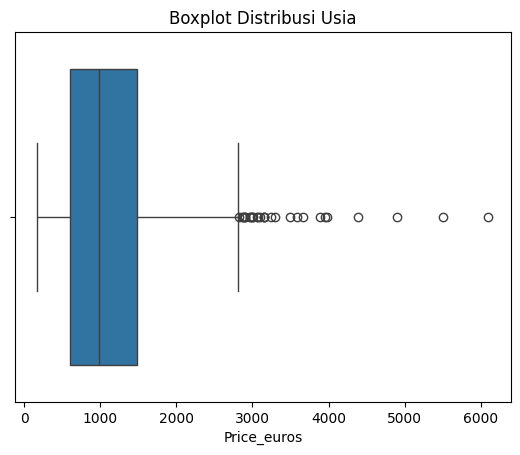

In [81]:
sns.boxplot(x='Price_euros', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()

In [82]:
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Price_euros'] = df['Price_euros'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

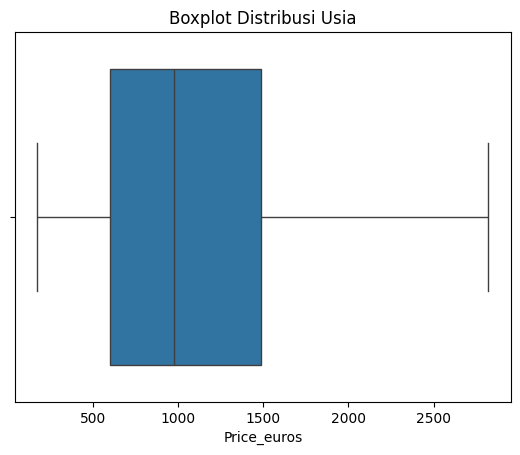

In [83]:
sns.boxplot(x='Price_euros', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()

In [85]:
df.duplicated().sum()

30

In [86]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
''' # Scaleeee
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a list of numeric column names
numeric_cols = ['Ram', 'Weight', 'CPU_Hz', 'Storage', 'PixelDensity']

# Choose your preferred scaling method
scaler = MinMaxScaler()  # For MinMax scaling
# scaler = StandardScaler()  # For standardization

# Fit and transform the scaler on the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())

In [88]:
df.to_csv('LTP_Clean.csv', index=False)